In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import *   # 引入sqrt(), pi, exp等
import cmath  # 要处理复数情况，用到cmath.exp(), 比np.快
import time


In [2]:
#定义哈密顿量和能带画图函数

def hamiltonian(k):  # 1D-SSH模型哈密顿量   
    matrix = np.zeros((2, 2))*(1+0j)   # 乘(1+0j)是为了把h0转为复数，也可dtype=complex
    matrix[0,1] = w+v*cmath.exp(-1j*k)
    matrix[1,0] = w+v*cmath.exp(1j*k)
    matrix[0,0] = 0
    matrix[1,1] = 0
    return matrix


def plot_bands_one_dimension(k, hamiltonian):
    dim = hamiltonian(0).shape[0]
    dim_k = k.shape[0]
    eigenvalue_k = np.zeros((dim_k, dim))
    i0 = 0
    for k0 in k:
        matrix0 = hamiltonian(k0)
        eigenvalue, eigenvector = np.linalg.eig(matrix0)
        eigenvalue_k[i0, :] = np.sort(np.real(eigenvalue[:]))
        i0 += 1
    for dim0 in range(dim):
        plt.plot(k, eigenvalue_k[:, dim0], '-k')
    plt.show()

In [3]:
#计算卷绕数

def winding_number():
    delta_1 = 1e-9  # 求导的步长（求导的步长可以尽可能短,应小于积分步长，不能相等）
    delta_2 = 1e-4  # 积分的步长（积分步长和计算时间相关，因此取一个合理值即可）
    W = 0  # Winding number初始化
    for k in np.arange(-pi, pi, delta_2):
        H = hamiltonian(k)
        log0 = cmath.log(H[0, 1])
    
        H_delta = hamiltonian(k+delta_1) 
        log1 = cmath.log(H_delta[0, 1])

        W = W + (log1-log0)/delta_1*delta_2 # Winding number
    W = W/2/pi/1j
    return W

In [4]:
#计算极化,即Zak phase/2/pi

def get_occupied_bands_vectors(x, matrix):  
    matrix0 = matrix(x)
    eigenvalue, eigenvector = np.linalg.eig(matrix0) 
    vector = eigenvector[:, np.argsort(np.real(eigenvalue))[0]] 
    return vector


def polarization():
    Num_k = 101
    k_array = np.linspace(-pi, pi, Num_k)
    vector_array = []
    for k in k_array:
        vector  = get_occupied_bands_vectors(k, hamiltonian) 
        vector_array.append(vector)

    # 计算Wilson loop
    W_k = 1
    for i0 in range(Num_k-1):
        F = np.dot(vector_array[i0+1].transpose().conj(), vector_array[i0])
        W_k = np.dot(F, W_k)
    nu = np.log(W_k)/2/pi/1j
    return nu

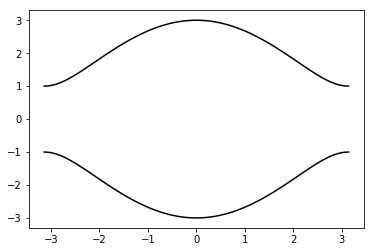

w = 1.00; v = 2.0000;         
Winding number = -1.0000+0.0000j         
Polarization = 0.5000+0.0092j
CPU执行时间(min) = 0.012033531666666663


In [5]:
def main():    
    k = np.linspace(-pi, pi, 101)
    plot_bands_one_dimension(k, hamiltonian)
    W = winding_number()
    p = polarization()
    print('w = {:.2f}; v = {:.4f}; \
        \nWinding number = {:.4f} \
        \nPolarization = {:.4f}'.format(w, v, W, p))

if __name__ == '__main__':  # 在当前文件运行main()，被import不执行。
    start_clock = time.perf_counter()
    w = 1; v = 2
    main()
    end_clock = time.perf_counter()
    print('CPU执行时间(min) =', (end_clock-start_clock)/60)

In [6]:
def find_vector_without_excess_phase(vector_0):
    angle = cmath.phase(vector_0[0])
    vector_1 = vector_0*cmath.exp(-1j*angle)
    return vector_1

def polarization_row():  #定义法求极化
    Num_k = 101
    delta_k = 1e-9
    k_array = np.linspace(-pi, pi, Num_k)
    vector_array = []
    W_k = 0
    for k in k_array:
        vector  = get_occupied_bands_vectors(k, hamiltonian)
        vector = find_vector_without_excess_phase(vector)
        vector_delta  = get_occupied_bands_vectors(k+delta_k, hamiltonian)
        vector_delta = find_vector_without_excess_phase(vector_delta)
        F = np.dot(vector.transpose().conj(), (vector_delta-vector)/delta_k)
        W_k += F
    nu = W_k/Num_k/1j
    return nu